<a href="https://colab.research.google.com/github/ellitraboulsi/CSI4106_A1_SearchAlgorithms/blob/main/CSI4106_A2_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ASSIGNMENT 2 - Classification Empirical Study: Naïve Bayes vs Logistic Regression

### Group Description

Group Number: 2 \\
Member Names: Elli Traboulsi, Yara Elmasry \\
Member Student Numbers: 300175764, 300157512 \\

### Empirical Study

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#import pandas_profiling


### 1. Familiarize yourself with the classification task and the dataset

*a. What is the goal of the task? Is this for a particular application?*

- The goal of the task for the wine quality dataset is to predict the quality of the wine based on the various features provided. Although no particular application is mentioned, this type of analysis can be useful for wine producers and wineries to possibly enhance the quality of their products (wines) with the use of this analysis.

*b. Characterize the dataset in terms of number of training examples, number of
features, missing data, etc.*

- Number of Training Examples: The dataset contains a total of 6497 instances of wine samples.
- Number of features: There are 12 features available for each wine sample. These features include:


1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9.  ph
10. Sulphates
11. Alcohol
12. Quality (the target variable).

- Missing Data: We will assess the dataset for any missing values before starting the analysis, because this could impact and quality of our results. Therefore, we will check for any null values in the dataset and handle them properly before proceeding with the classification task.

**The Dataset**

The dataset we will be working with for this empirical study is the Wine Quality dataset from Kaggle. (https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data)

We chose this dataset for our classification tasks because of its size and features. This dataset has 12 features and just over 6000 instances which makes it well suited for Naive Bayes. It can help mitigate the risk of overfitting. There is a discrete "quality" variable that is likely going to be our target variable for classification as well as a diverse set of variables that can influence the quality of wine. This allows for various classification scenarios including naive bayes classification and logistic regression. The dataset appears to be clean and well-structured making it a suitable candidate for modeling. Overall, the domain relevance and practical application of the wine quality assessment make this dataset a desirable pick for classification.



In [ ]:
# Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/ellitraboulsi/CSI4106_A1_SearchAlgorithms/main/winequality-white.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# checking for any missing values in the dataset
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Characterizing the dataset
num_training_examples = data.shape[0]
num_features = data.shape[1] - 1  #Excluding our target variable "quality"

print(f"Number of training examples: {num_training_examples}")
print(f"Number of features: {num_features}")

Number of training examples: 4898
Number of features: 11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 2. Brainstorm about the attributes (Feature engineering)
a. Think about the features that could be useful for this task, are they all present in the
dataset? Anything missing? Any feature provided that doesn’t seem useful to you?
Do you have the domain expertise to answer these questions? If you don't, think of
ways to explore the attributes to establish whether they appear to influence the
classification.

- While the dataset offers a number of physicochemical features associated with wine, some additional features can be beneficial for predicting wine quality. For instance, the dataset could include the grape variety (type of grape grown), vineyard's geographic location, and the growing season.

- When analyzing the dataset features, it is important to acknowledge that some features may be redundant and irrelevant. Therefore, we conducted a correlation analysis using a correlation matrix heatmap (as seen below) to determine which features appear to influence the classification.

(DO ANALYSIS TALK ABOUT THE HEATMAP!!)



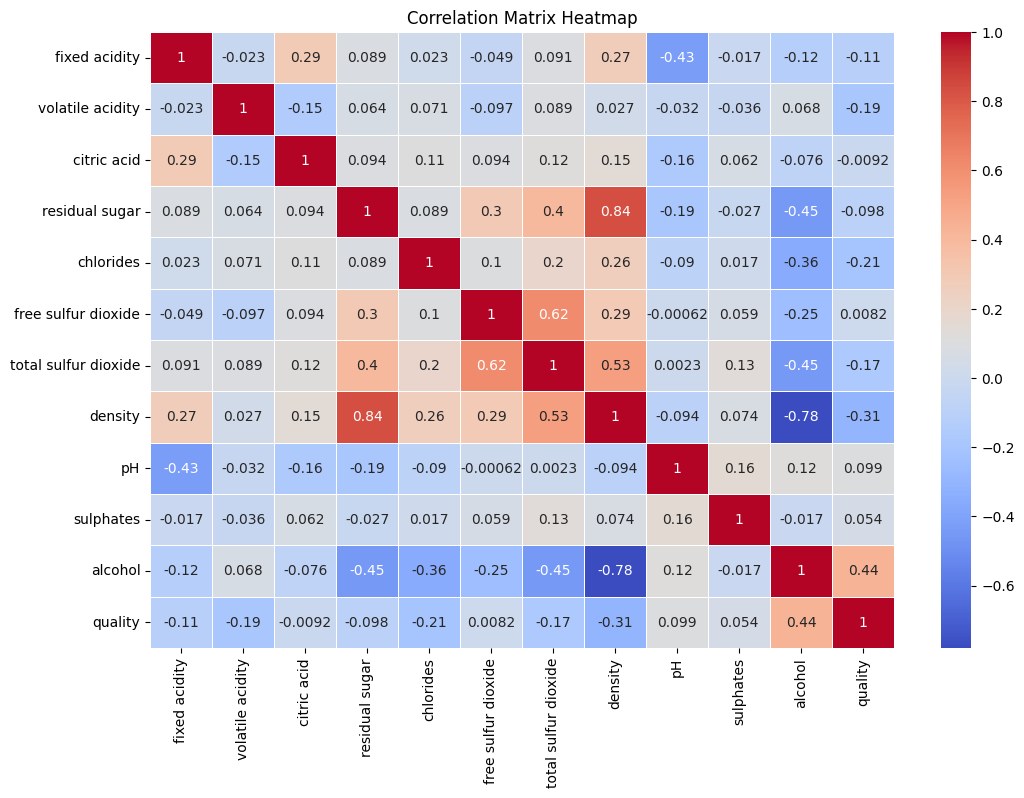

In [ ]:
#Conducting a correlation matrix heatmap
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

b. What are the ranges of each feature? Try to compare and visualize those ranges. We discussed in class that attribute normalisation is often promoted as empirically helping to improve performances. Do you think this would be useful for your study?

- We visualized the ranges of each feature using the approach below which includes the minimum and maximum values. We also visualized the ranges using box plots. The box plots provide a clear visualization of the distribution and ranges of each feature, allowing easy comparision between features.

- Normalization can prevent particular features from dominating over other features during the analysis process. According to our study, the features have varying scales, thus normalization would be beneficial for our study. However, it is important for us to experiment without normalization to observe its impact on the performance of the classification models.

Ranges of each feature:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
min            3.8              0.08         0.00             0.6      0.009   
max           14.2              1.10         1.66            65.8      0.346   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
min                  2.0                   9.0  0.98711  2.72       0.22   
max                289.0                 440.0  1.03898  3.82       1.08   

     alcohol  quality  
min      8.0      3.0  
max     14.2      9.0  


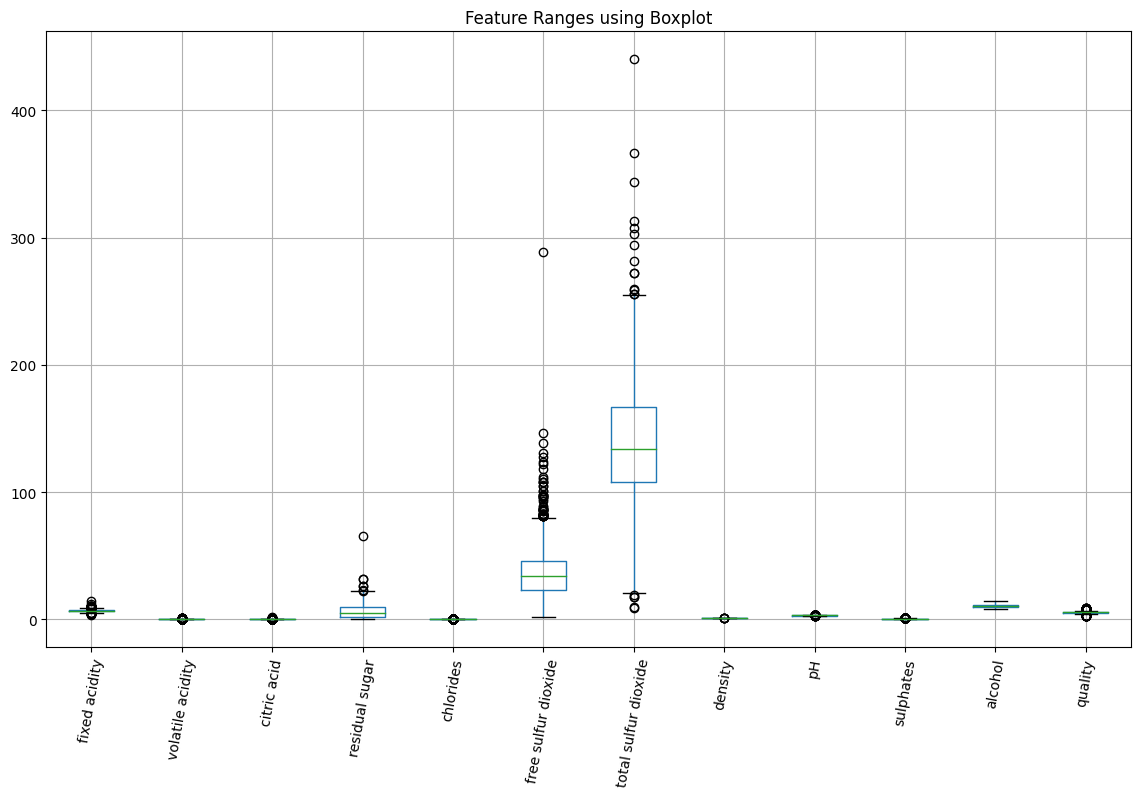

In [ ]:
# Visualizing the ranges of each feature
print("Ranges of each feature:")
print(data.describe().loc[['min', 'max']])

# Visualizing the ranges of each feature using box plots
plt.figure(figsize=(14, 8))
data.boxplot(rot=80)
plt.title('Feature Ranges using Boxplot')
plt.show()

### 3. Encode the features
- The dataset includes continuous attributes, except for the 'quality' attribute (discrete attribute). Therefore, we performed one-hot encoding on the 'quality' attribute as shown below. Now are dataset is ready for Logistic Regression and our attributes are all continuous.

- For Naive Bayes, discrete attributes, use CategoricalNB and continuous attributes, use GaussianNB

In [ ]:
# Applying one-hot encoding to the 'quality' attribute
one_hot_encoder = OneHotEncoder(sparse=False)
quality_encoded = one_hot_encoder.fit_transform(data[['quality']])
quality_encoded_df = pd.DataFrame(quality_encoded, columns=['quality_' + str(i) for i in range(quality_encoded.shape[1])])

# Concatenating the encoded dataframe with the original dataset
data_quality_encoded = pd.concat([data, quality_encoded_df], axis=1)

# original 'quality' column
data_quality_encoded.drop('quality', axis=1, inplace=True)

# Displaying the modified dataset
print("\nModified dataset with the 'quality' attribute one-hot encoded")
print(data_quality_encoded.head())


Modified dataset with the 'quality' attribute one-hot encoded
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality_0  

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_quality_encoded.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.004083,0.033279,0.297468,0.448755,0.179665,0.035729,0.001021
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.063777,0.179382,0.457191,0.497418,0.383948,0.185632,0.031937
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Define 2 models using some default parameters
- a. Logistic Regression Model: You will see that in scikit-learn there is a long list of parameters for logistic regression. Don't worry too much... just try to understand some parameters. We will discuss this again later in the semester. Also, later, in step 6, you will need to vary some parameters.
- b. Naïve Bayes Model: For the Naive Bayes model, there are also some parameters you can explore in step 6.

In [ ]:
# Important imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Defined X value and y value
X = data.drop('quality', axis=1)
y = data['quality']

#Split the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the data (normalization of data mean = 0 standard deviation = 1)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [ ]:
# Logistic Regression Model

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_std, y_train)
y_predict_lr = lr_model.predict(X_test_std)
accuracy_lr = accuracy_score(y_test, y_predict_lr)

print(f"The Accuracy of Logistic Regression Model is {accuracy_lr}")

The Accuracy of Logistic Regression Model is 0.5316326530612245


In [ ]:
# Gaussian Naive Bayes Classification Model

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_predict_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_predict_nb)

print(f"The Accuracy of Naive Bayes Model is {accuracy_nb}")

The Accuracy of Naive Bayes Model is 0.4387755102040816


### 5. Train/test/evaluate your 2 models in cross-validation
- a. Use a 4-fold cross validation. Or (optional) you can explore by yourself the impact of using different values of k for k-fold.



In [ ]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold

### 4-fold cross-validation for Logistic Regression

In [ ]:
#Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=2000)
acc_score = []

for train_index, test_index in kf.split(X_std):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model.fit(X_train, y_train)
    predict_values_lr = lr_model.predict(X_test)

    acc = accuracy_score(predict_values_lr, y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score) / 4

print('The Accuracy of each fold for Logistic Regression:', acc_score)
print('The Average Accuracy for Logistic Regression:', avg_acc_score)

The Accuracy of each fold for Logistic Regression: [0.5257142857142857, 0.5395918367346939, 0.545751633986928, 0.5359477124183006]
The Average Accuracy for Logistic Regression: 0.536751367213552


### 4-fold cross-validation for Naive Bayes

In [ ]:
#Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Naive Bayes
nb_model = GaussianNB()
acc_score_nb = []

for train_index, test_index in kf.split(X_std):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]

    nb_model.fit(X_train, y_train)
    predict_values_nb = nb_model.predict(X_test)

    acc_nb = accuracy_score(predict_values_nb, y_test)
    acc_score_nb.append(acc_nb)

avg_acc_score_nb = sum(acc_score_nb) / 4

print('The Accuracy of each fold for Naive Bayes:', acc_score_nb)
print('The Average Accuracy for Naive Bayes:', avg_acc_score_nb)

The Accuracy of each fold for Naive Bayes: [0.42122448979591837, 0.433469387755102, 0.44362745098039214, 0.46405228758169936]
The Average Accuracy for Naive Bayes: 0.44059340402827796


- b. Perform an evaluation with precision/recall measures. Since you are looking at a multi-class problem, make sure that you compare micro and macro averages on precision and recall. Discuss the differences (if any) obtained. For your particular dataset, are the classes balanced? That would impact the micro/macro results.

In [ ]:
# Classification Report for Logistic Regression
from sklearn.metrics import accuracy_score, classification_report

print("Classification Report:\n", classification_report(y_test, predict_values_lr))

Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.20      0.33         5
           4       0.80      0.09      0.17        43
           5       0.58      0.51      0.54       379
           6       0.52      0.75      0.62       550
           7       0.46      0.23      0.31       201
           8       0.00      0.00      0.00        41
           9       0.00      0.00      0.00         5

    accuracy                           0.54      1224
   macro avg       0.48      0.25      0.28      1224
weighted avg       0.52      0.54      0.50      1224



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Classification Report for Naive Bayes
from sklearn.metrics import accuracy_score, classification_report

print("Classification Report:\n", classification_report(y_test, predict_values_nb))

Classification Report:
               precision    recall  f1-score   support

           3       0.09      0.20      0.13         5
           4       0.35      0.21      0.26        43
           5       0.55      0.56      0.55       379
           6       0.53      0.37      0.43       550
           7       0.35      0.71      0.47       201
           8       0.09      0.02      0.04        41
           9       0.00      0.00      0.00         5

    accuracy                           0.46      1224
   macro avg       0.28      0.30      0.27      1224
weighted avg       0.48      0.46      0.45      1224



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. For each type of model (Naïve Bayes and Logistic Regression), modify some parameters, and perform a train/test/evaluate again. Do this for two times.

- a. State clearly what parameters you are changing using comments and a different cell per experiment. The parameters should be chosen in a way that they have an impact on the performance of the model. Parameters such as the number of iterations or “verbose” for logistic regression are not acceptable.
  - For example, for Naïve bayes you can change the smoothing parameter. For Logistic Regression you can change the solver or tolerance. Explore changing other parameters (if any) than suggested.

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

In [ ]:
# logistic regression with default values

# fit model
lr_model.fit(X_train,y_train)

# Score X and Y - test and train model Logistic Regression
print("Score the X-train with Y-train is : ", lr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", lr_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_lr=lr_model.predict(X_test)

# Model Evaluation
print( "The mean absolute error is: ", mean_absolute_error(y_test,y_pred_lr))
print("The mean squared  error is: " , mean_squared_error(y_test,y_pred_lr))
print("The median absolute error is: " ,median_absolute_error(y_test,y_pred_lr))

print("The accuracy score is: " , accuracy_score(y_test,y_pred_lr))

Score the X-train with Y-train is :  0.5920745920745921
Score the X-test  with Y-test  is :  0.5894736842105263
The mean absolute error is:  0.45263157894736844
The mean squared  error is:  0.543859649122807
The median absolute error is:  0.0
The accuracy score is:  0.5894736842105263


In [ ]:
# logistic regression with changed parameters

In [ ]:
# logistic regression with changed parameters

In [ ]:
# naive bayes with default values

nb_model.fit(X_train, y_train)

##this replaces the entire box above
y_pred_nb = nb_model.predict(X_test)

print( "The mean absolute error is: ", mean_absolute_error(y_test,y_pred_nb))
print("The mean squared  error is: " , mean_squared_error(y_test,y_pred_nb))
print("The median absolute error is: " ,median_absolute_error(y_test,y_pred_nb))

print("The accuracy score is: " , accuracy_score(y_test,y_pred_nb))

The mean absolute error is:  0.519650655021834
The mean squared  error is:  0.6244541484716157
The median absolute error is:  0.0
The accuracy score is:  0.5283842794759825


In [ ]:
# naive bayes with changed parameters

In [ ]:
# naive bayes with changed parameters

### 7. Analyze the obtained results
- a. Compare quantitatively (with the precision/recall measures) your 6 results. Your 6 results should use the same cross-validation technique (same k). The 6 results come from 2 models, each with default parameters from step 5 + 2 variations from step 6. Make sure to show your tests in cells. If you change a parameter, create a new cell and test. If you are making graphs for visualization, the values should not be "hardcoded".

- b. As was mentioned before, since you are looking at a multi-class problem, make sure that you compare with micro and macro averages on precision and recall. Discuss the differences (if any) obtained.

### References

https://www.askpython.com/python/examples/k-fold-cross-validation

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://matplotlib.org/stable/users/explain/colors/colormaps.html
